__Introduction to GeoPandas__

https://geopandas.org/en/stable/getting_started/introduction.html

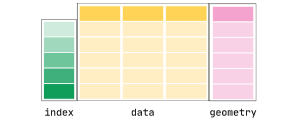

In [2]:
# !pip install geopandas

In [3]:
import geopandas as gpd

## модельные датасеты

In [4]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
gdf = gpd.read_file( gpd.datasets.get_path('nybb') )

gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

<AxesSubplot:>

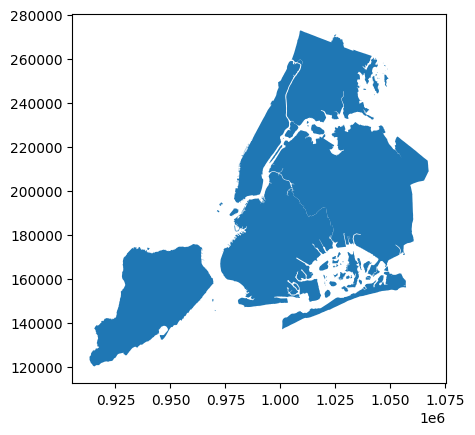

In [6]:
gdf.plot()

In [7]:
# gdf.to_file('nybb.geojson', driver="GeoJSON")

## меряем площадь областей

In [8]:
gdf = gdf.set_index("BoroName")

In [9]:
gdf["area"] = gdf.area
gdf[["area"]]

area
BoroName                   
Staten Island  1.623822e+09
Queens         3.045214e+09
Brooklyn       1.937478e+09
Manhattan      6.364712e+08
Bronx          1.186926e+09

## границы областей

In [10]:
gdf['boundary'] = gdf.boundary
gdf[['boundary']]

boundary
BoroName                                                        
Staten Island  MULTILINESTRING ((970217.022 145643.332, 97022...
Queens         MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn       MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan      MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx          MULTILINESTRING ((1012821.806 229228.265, 1012...

<AxesSubplot:>

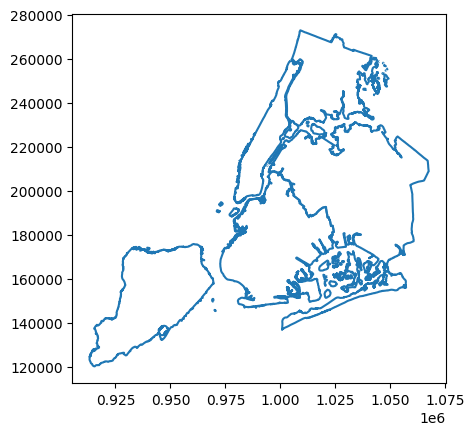

In [11]:
gdf['boundary'].plot()

## центры областей

In [12]:
gdf['centroid'] = gdf.centroid
gdf[['centroid']]

centroid
BoroName                                     
Staten Island   POINT (941639.450 150931.991)
Queens         POINT (1034578.078 197116.604)
Brooklyn        POINT (998769.115 174169.761)
Manhattan       POINT (993336.965 222451.437)
Bronx          POINT (1021174.790 249937.980)

<AxesSubplot:>

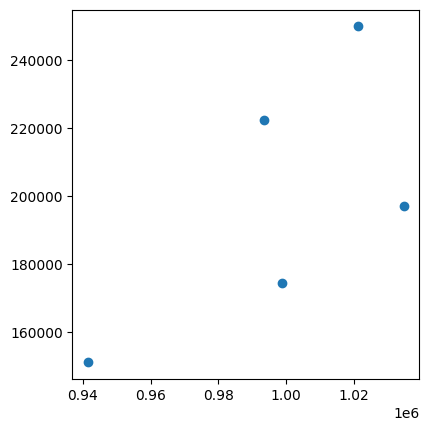

In [13]:
gdf['centroid'].plot()

## оценка расстояния

In [14]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf[['distance']]

distance
BoroName                    
Staten Island       0.000000
Queens         103781.535276
Brooklyn        61674.893421
Manhattan       88247.742789
Bronx          126996.283623

In [15]:
gdf['distance'].mean() # среднее расстояние

76140.09102166798

## рисуем карты

In [16]:
gdf.sample(3)

BoroCode     Shape_Leng    Shape_Area  \
BoroName                                           
Brooklyn          3  741080.523166  1.937479e+09   
Manhattan         1  359299.096471  6.364715e+08   
Queens            4  896344.047763  3.045213e+09   

                                                    geometry          area  \
BoroName                                                                     
Brooklyn   MULTIPOLYGON (((1021176.479 151374.797, 102100...  1.937478e+09   
Manhattan  MULTIPOLYGON (((981219.056 188655.316, 980940....  6.364712e+08   
Queens     MULTIPOLYGON (((1029606.077 156073.814, 102957...  3.045214e+09   

                                                    boundary  \
BoroName                                                       
Brooklyn   MULTILINESTRING ((1021176.479 151374.797, 1021...   
Manhattan  MULTILINESTRING ((981219.056 188655.316, 98094...   
Queens     MULTILINESTRING ((1029606.077 156073.814, 1029...   

                                 centroid       distance  
BoroName                                                  
Brooklyn    POINT (998769.115 174169.761)   61674.893421  
Manhattan   POINT (993336.965 222451.437)   88247.742789  
Queens     POINT (1034578.078 197116.604)  103781.535276

<AxesSubplot:>

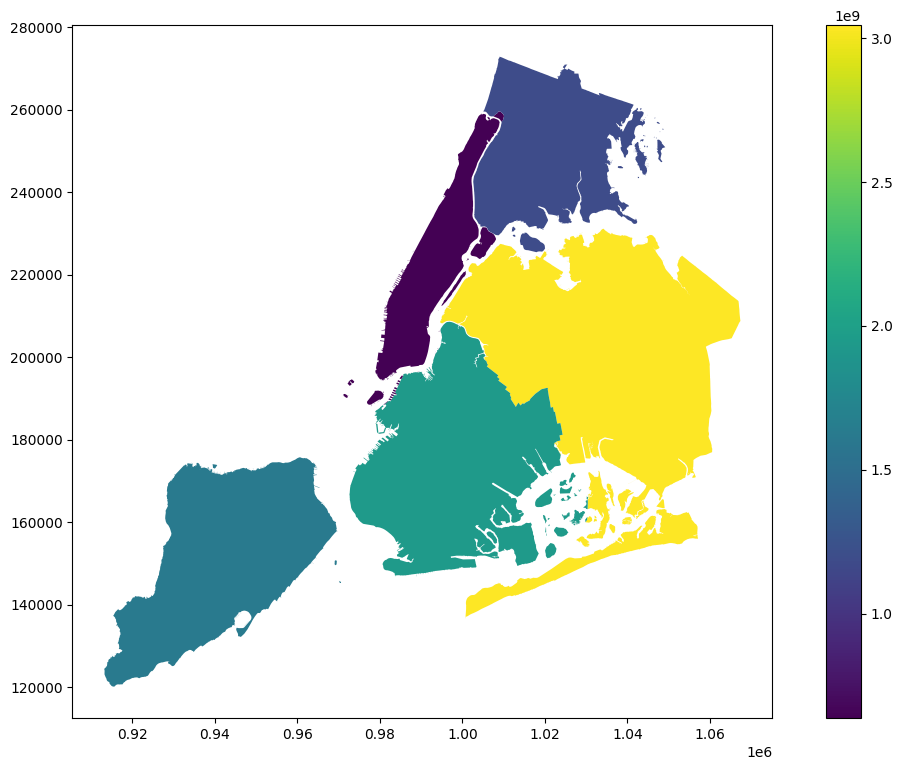

In [17]:
# визуализация оценки площади областей
gdf.plot('area', legend=True, figsize=(14,9))

In [18]:
# !pip install folium matplotlib mapclassify

In [19]:
# визуализация оценки площади областей c наложением на карту
gdf.explore('area', legend=False)

<AxesSubplot:>

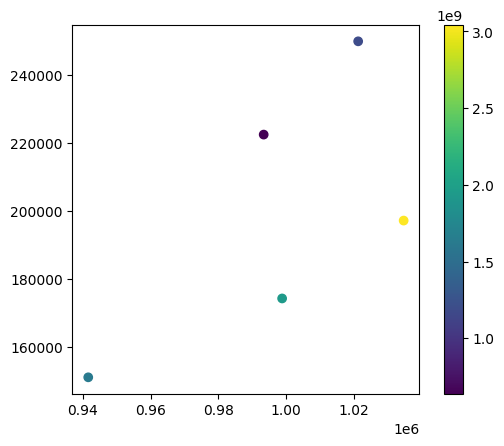

In [20]:
gdf = gdf.set_geometry("centroid") # Switching the active geometry 
gdf.plot("area", legend=True)

<AxesSubplot:>

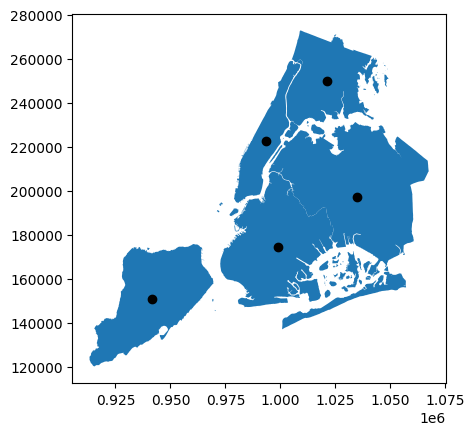

In [21]:
# рисование с наложением данных 
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

In [22]:
gdf = gdf.set_geometry("geometry") # set the active geometry back to the original 

## выпуклая оболочка

<AxesSubplot:>

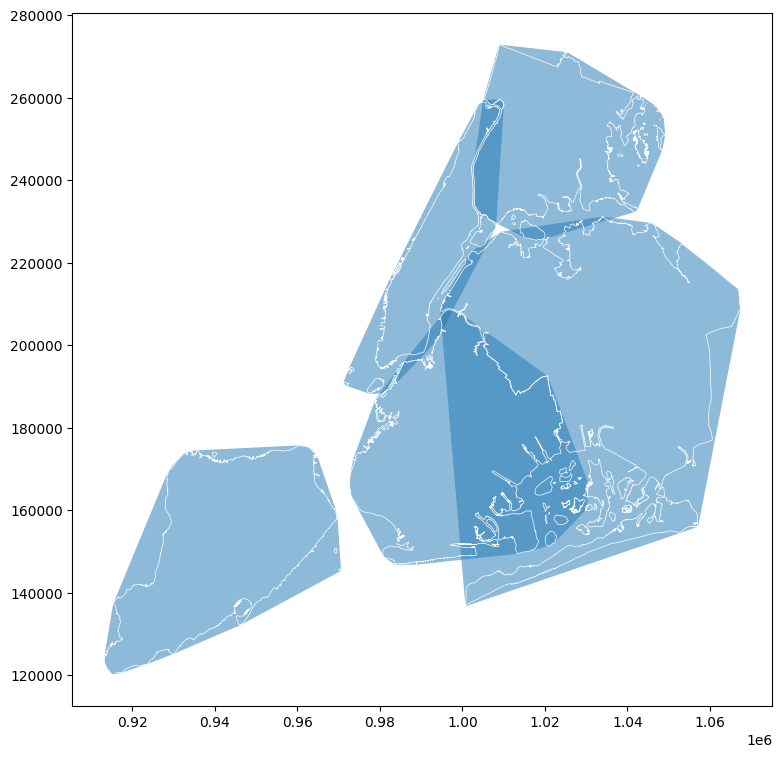

In [23]:
gdf["convex_hull"] = gdf.convex_hull
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["convex_hull"].plot(alpha=.5,figsize=(14,9))  
# passing the first plot and setting linewitdth to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5,figsize=(14,9)) 

## увеличение областей (буферные зоны на границах)

<AxesSubplot:>

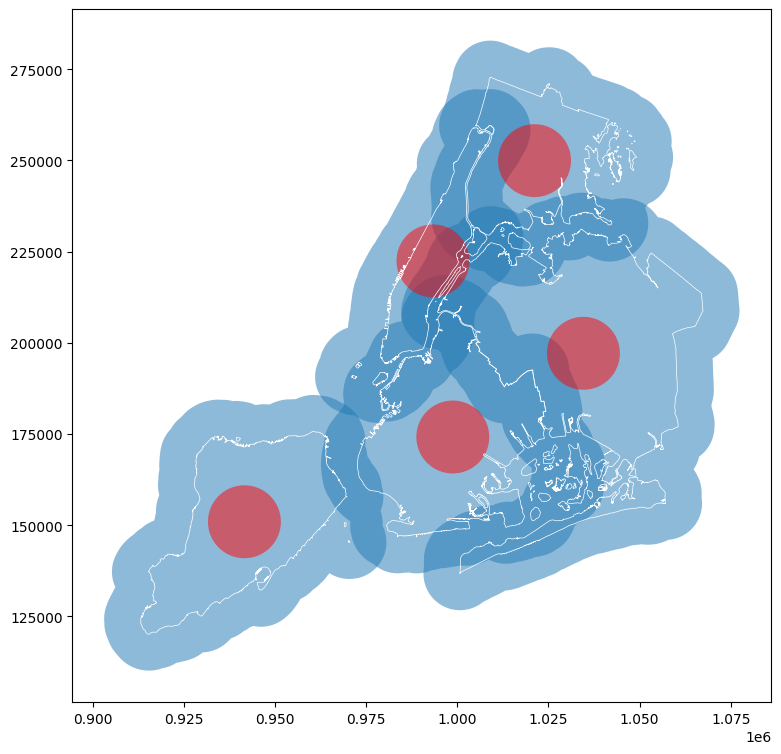

In [24]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10_000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10_000)

# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["buffered"].plot(alpha=.5,figsize=(14,9)) 

# passing the first plot as an axis to the second
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=.5,figsize=(14,9))  

# passing the first plot and setting linewitdth to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5,figsize=(14,9))

## пересечение областей с учётом буферных зон

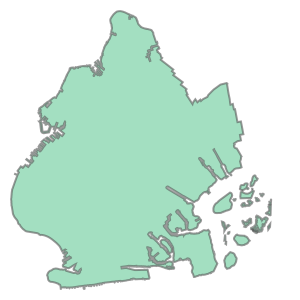

In [25]:
brooklyn = gdf.loc["Brooklyn", "geometry"]
brooklyn

In [26]:
type(brooklyn)

shapely.geometry.multipolygon.MultiPolygon

In [27]:
gdf["buffered"].intersects(brooklyn)

BoroName
Staten Island     True
Queens            True
Brooklyn          True
Manhattan         True
Bronx            False
dtype: bool

## оценка попадания точки в область с учётом буферных зон

In [28]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

BoroName
Staten Island     True
Queens            True
Brooklyn         False
Manhattan        False
Bronx            False
Name: within, dtype: bool

<AxesSubplot:>

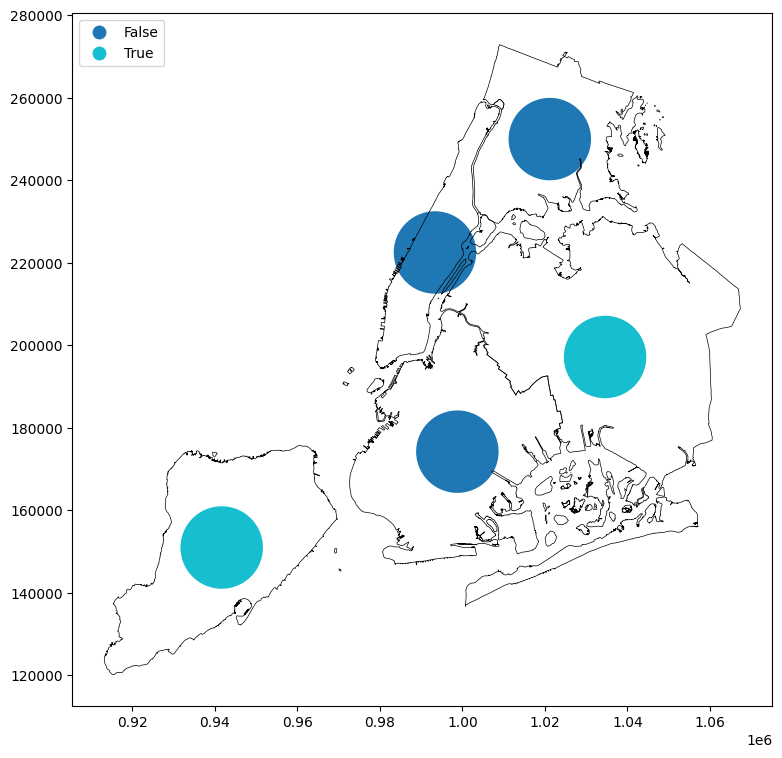

In [29]:
gdf = gdf.set_geometry("buffered_centroid")

# using categorical plot and setting the position of the legend
ax = gdf.plot("within", legend=True, categorical=True,
              legend_kwds={'loc': "upper left"},figsize=(14,9))  

# passing the first plot and setting linewitdth to 0.5
gdf["boundary"].plot(ax=ax, color="black", linewidth=.5,figsize=(14,9)) 

## преобразования систем координат

In [30]:
gdf.crs # Coordinate Reference System (CRS)

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

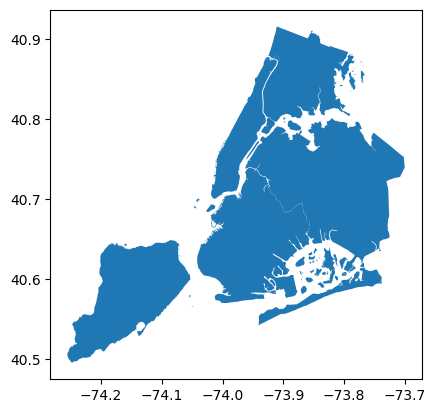

In [31]:
gdf = gdf.set_geometry("geometry")
boroughs_4326 = gdf.to_crs("EPSG:4326")
boroughs_4326.plot()

In [32]:
boroughs_4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.10.7
IPython version      : 8.4.0

geopandas: 0.11.1

